
## SLplay.py - The truth machine

The point of this notebook is to help you think critically, form hypotheses, and test them. For that, we'll perform a basic supervised learning exercise, where we'll use the Perceptron algorithm to learn the weights of a linear binary classifier. We'll generate the data randomly, consisting of $n$ binary features, and the label will be the first feature with some additional noise. 

[Here's](https://www.simplilearn.com/what-is-perceptron-tutorial) a quick refresher on perceptrons. Note that in the example in the link function outputs are +1 or -1 while in the example below a value is 0 or 1.

---

First, go through the boilerplate code to get comfortable with the functions that you'll be using.


In [0]:
# SLplay module
import matplotlib.pyplot as plt
import numpy as np
import random

In [0]:
# some helper functions

def sign(s):
    """sign of s as 0/1"""
    if s > 0:
        return 1
    else:
        return 0

def sum_of_ten(x):
    return np.sum(x[0:10])

def logistic(s):
    return 1 / (1 + np.exp(-s))

In [0]:
def experiment(num_features=50,
               num_timesteps=400,
               num_runs=100,
               bin_size=10,
               feature_probs=[.5, .5],  # To return 1 90% of the time change to: [.1, .9]
               alpha=0.01,              
               noise=0):
    
    """run an experiment"""
    x = np.zeros(num_features)
    MSE = np.zeros(num_timesteps // bin_size) # alternatively, one could smoothen the output curve

    # In each run:
    for run in range(num_runs):

        # Create a weight vector:
        w = np.zeros(num_features)
        # w = np.random.randn(num_features)

        # In each timestep:
        for t in range(num_timesteps):

            # Generate a random feature vector:
            x = np.random.choice([0, 1], size=(num_features,), p=feature_probs)

            # Evaluate the activation function and do the Perceptron update:
            y = sign(np.dot(w, x))
            z = x[0] + random.gauss(0, noise) # the target is the first feature with some noise
            w += alpha * (z - y) * x
            error = (z - y) ** 2

            # Save the error to plot it later:
            MSE[t // bin_size] += error
    MSE = MSE / (bin_size * num_runs)
    return MSE

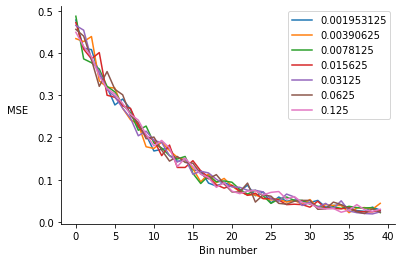

In [4]:
# Remove top and right lines of the plot 
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

alphas = [2**e for e in range(-9, -2)]

results = {}
for alpha in alphas:
  results[alpha] = (experiment(bin_size=10, alpha=alpha))
  plt.plot([min(0.5,e) for e in results[alpha]], label=str(alpha))
plt.ylabel('MSE', rotation=0, labelpad=20)
plt.xlabel('Bin number')

# alphas = 
# plt.plot(alphas, [min(3, experiment(alpha=a)[-1]) for a in alphas])
# for alpha in alphas:
#    plt.plot([min(100,e) for e in experiment(num_timesteps=1000, bin_size=50, num_runs=500, alpha=alpha)])

plt.legend()
plt.show()

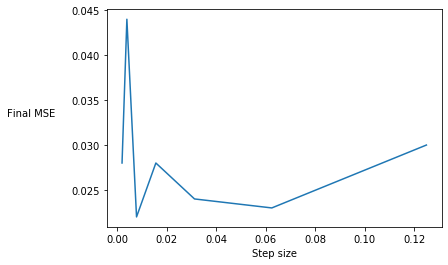

In [5]:
final_MSEs = [min(0.5, results[alpha][-1]) for alpha in alphas]
plt.plot(alphas, final_MSEs)
plt.xlabel('Step size')
plt.ylabel('Final MSE', rotation=0, labelpad=40)
plt.show()

Now here are some questions to think about. Read each question, think about what the answer should be, form a hypothesis that you can test with the above code, then perform an experiment! 

To edit the code, you should have the notebook 'Open in playground' mode.

1.   What happens when the step size $\alpha$ is halved? Or doubled?
2.   What happens when the number of features is doubled?
3.   What happens if there is a bias term?
4.   Is it important that the binary input vectors have the same number of $1$s? Change the feature probabilities to explore the effects.
5.   Make alternate problem with constant numbers of $1$s; compare learning rate.
6.   What if the inputs are not 0s and 1s, but 6s and 7s? Does it affect the learning rate? 
7.   What if the error function is cross entropy instead of MSE?

Now change the learning system from a classifier to a regressor. This means the guesses (estimates) are real numbers rather than 0/1 ([another refresher](https://medium.com/quick-code/regression-versus-classification-machine-learning-whats-the-difference-345c56dd15f7)).

In this case, you should be able to show that various measures of MSE, such as final MSE or cumulative MSE, are U-shaped functions of $\alpha$ (like in Figure 9.2).

You should be able to show that the rule for $\alpha$ in the book is good (Eq 9.19).

Now try adding some noise. What is the effect on the optimal step size, $\alpha$?

Suppose you ran the experiment four times longer, or four times shorter. What would be the effect on the optimal step size?
